# 7. Logistic Regression with PyTorc
## 1. About Logistic Regression

### 1.1 Logistic Regression Basics
#### Classification Algorithm
* Example: Spam vs. not Spam
    * Input: Bunch of Words
    * Output: Probability of Spam or Not

#### Basic Comparison to Linear Reg.
* **Linear Regression**
    * Output: numeric value given inputs
* **Logistic Regression**
    * Output: probability [0,1] given input belonging to class
    
#### Input / Output Comparison
* **Linear Regression: Multiplication**
    * Input: [1]
        * Output: 2
    * Input: [2]
        * Output: 4
    * Trying to model the relationship $y=2x$
* **Logistic Regression: Spam Classifier**
    * Input: "Sign up to get 1 million dollarz tonight!"
        * Output: probability p = 0.8
    * Input: "Receipt for your recent purchase from Amazon"
        * Ouput: probability p = 0.3
    * **p: Probability it is spam**

### 1.2 Problems with Linear Regression
* Example
    * Fever
    * **Input**: Temperature
    * **Output**: fever or no fever
* Remember
    * **Linear Regression**: minimize error between data points and line.

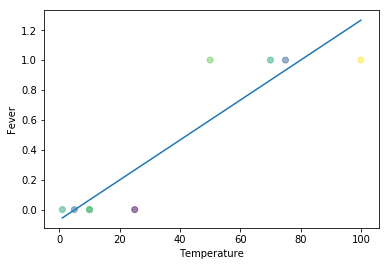

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 5, 10, 10, 25, 50, 70, 75, 100,]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel('Fever')
plt.xlabel('Temperature')

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

Not very useful when the output is discrete!

#### Linear Regression Problem 1
Fever value can go negative (below 0) and positive (above 1)

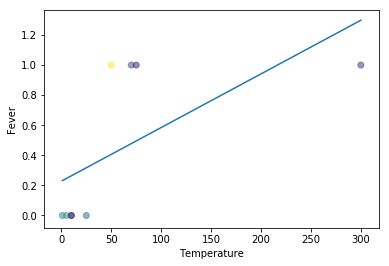

In [2]:
x = [1, 5, 10, 10, 25, 50, 70, 75, 300,]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel('Fever')
plt.xlabel('Temperature')

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

#### Linear Regression problem 2
Fever points not predicted with outliers

### 1.3 Logistic Regression In-depth

**Predicting Probability**
* Linear Regression doesn't work
* Instead of predicting direct values: **predict probability**

There's an graphic used in the lecture that I won't be able to recreate. Just refer to the lecture on Logistic Regression if you need to see it again. 

**Logistic Function**
* Two-class logistic regression
* $y=Ax+b$
* $g(y)=Ax+b$
* $g(y)=\frac{1}{1+e^{-y}}=\frac{1}{1+e^{-(Ax+b)}}$
* g(y) = Estimated probability that y=1 given x

**Softmax Function** g()
* multi-class logistic regression
* Generalization of Logistic Function

**Cross Entropy Function D()**
* $D(S,L) = LlogS-(1-L)log(1-S)$
    * If L=0 (label)
        * $D(S,0) = -log(1-S)$
            * $-log(1-S)$: less positive if $S\to 0$
            * $-log(1-S)$: more positive if $S\to 1$ (BIGGER LOSS)
    * If L=1 (label)
        * $D(S,1) = logS$
            * $logS$: less negative if $L\to 1$
            * $logS$: more negative if $L\to 0$ (BIGGER LOSS)

In [3]:
# Example of the above cross-entropy function using numbers

import math
print(-math.log(1-0.00001))
print(-math.log(1-0.99999))

print(math.log(0.99999))
print(math.log(0.00001))

1.0000050000287824e-05
11.51292546497478
-1.0000050000287824e-05
-11.512925464970229


**Cross Entropy Loss L**
* Goal: Minimizing Cross Entropy Loss
* $L = \frac1N \sum_i{D(g(Ax+b), L_i)}$

## 2. Building a Logistic Regression Model with PyTorch

Here he has a graphic illustrating logistic regression with softmax and cross entropy as it would be applied to the MNIST dataset. (Nice, good and familiar)

**Steps**
* Step 1. Load the dataset
* Step 2. Make dataset iterable
* Step 3. Create model class
* Step 4. Instantiate model class
* Step 5. Instantiate loss class
* Step 6. Instantiate optimizer class
* Step 7. Train the model

### Step 1a: Load the MNIST training Dataset

**Images from 0 to 9**

In [5]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [6]:
train_dataset = dsets.MNIST(root="./data",
                            train=True,
                            transform=transforms.ToTensor(), 
                            download=True)

Processing...
Done!


In [7]:
len(train_dataset)

60000

In [8]:
train_dataset[0]

(
 (0 ,.,.) = 
 
 Columns 0 to 8 
    0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.1176
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.1922  0.9333
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0706  0.8588
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.3137
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   

In [10]:
type(train_dataset[0])

tuple

In [11]:
#Input Matrix
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [12]:
# Label
train_dataset[0][1]

5

Basically, the dataset consists of two-tuples where the first element is a tensor of the pixel data (1x28x28) and the second element is the label (i.e. what number is written in the pixel data)

**Displaying MNIST**

In [13]:
%matplotlib inline

In [14]:
train_dataset[0][0].numpy().shape #invoking the .numpy() method converts the tensor to a numpy array.

(1, 28, 28)

In [15]:
show_img = train_dataset[0][0].numpy().reshape(28,28)

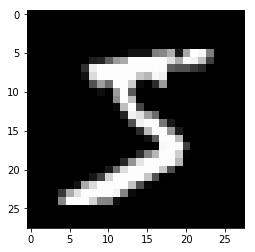

In [16]:
plt.imshow(show_img, cmap='gray')

In [17]:
# The label for the above image
train_dataset[0][1]

5

In [18]:
show_img = train_dataset[1][0].numpy().reshape(28,28)

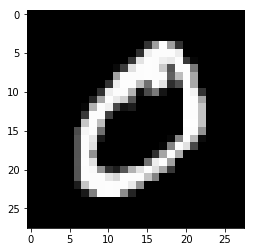

In [19]:
plt.imshow(show_img, cmap='gray')

In [20]:
train_dataset[1][1]

0

### Step 1b: Load the MNIST Test Dataset
* Show our algorithm works beyond data we trained on (Generalizes well)
* Out-of-sample (prevent overfitting)

In [21]:
test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

In [22]:
len(test_dataset)

10000

In [23]:
type(test_dataset[0])

tuple

In [24]:
#image matrix
test_dataset[0][0].size()

torch.Size([1, 28, 28])

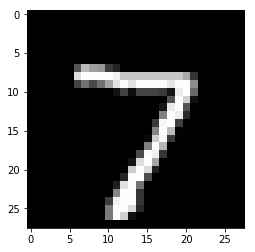

In [25]:
show_img = test_dataset[0][0].numpy().reshape(28,28)
plt.imshow(show_img, cmap='gray')

In [26]:
# Label
test_dataset[0][1]

7

### Step 2: Make Dataset Iterable

* Aim: make dataset iterable
* **Total Data:** 60,000 
* **mini-batch:** 100
    * Number of examples in 1 iteration
* **iterations:** 3000
    * 1 iteration: 1 mini-batch forward and backward pass
* **epochs**
    * 1 epoch: running through the whole dataset once
    * $epochs=iterations \div \frac{totaldata}{mini-batch} = 3000 \div {60000\over 100} = 5$

In [27]:
len(train_dataset)

60000

In [28]:
batch_size = 100

In [29]:
n_iters = 3000

In [32]:
num_epochs = int(n_iters / (len(train_dataset) / batch_size))
num_epochs

5

** Create Iterable Object: Training Dataset **

In [33]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

**Check Iterability**

In [34]:
import collections                       # collections is a way to check that our loader is iterable
isinstance(train_loader, collections.Iterable) #Could I use this to check whterh my generator is iterable in fast.ai?

True

**Create Iterable Object: Test Dataset**

In [35]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

**Check Iterability**

In [36]:
isinstance(test_loader, collections.Iterable)

True

**Main Aim: Iterate Through Dataset**

In [37]:
img_1 = np.ones((28,28))
img_2 = np.ones((28,28))
lst = [img_1, img_2]

In [38]:
# For example the below is what we're trying to do in a nutshell
# Think of the numbers as images
for _ in lst:
    print(_.shape)

(28, 28)
(28, 28)


### Step 3: Building the Model

In [39]:
# Exactly the same as Linear Regression! 

class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self,).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return output_dim                
# Notice that in model creation we always have just two parts, the init part and the forward part.

### Step 4: Instantiate Model Class

* Input Dimension:
    * Size of image
    * 28 x 28 = 784
* Output Dimension: 10
    * 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

In [40]:
# Size of Images
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [41]:
input_dim = 28*28
output_dim = 10
model = LogisticRegressionModel(input_dim, output_dim)

### Step 5: Instantiate Loss Class

* **Logistic Regression:** Cross Entropy Loss
    * _Linear Regression: MSE_

In [42]:
criterion = nn.CrossEntropyLoss()

**What Happens in `nn.CrossEntropyLoss()`?**

* Computes softmax (logistic / softmax function)
* Computes cross entropy

** Back to the image of logistic regression with the columns of logits, softmax, cross entropy **

### Step 6: Instantiate Optimizer Class 

* Simplified Equation
    * $\theta = \theta - \eta \cdot \nabla_\theta$
        * $\theta$: Parameters (our variables)
        * $\eta$: Learning Rate
        * $\nabla_\theta$: Our Parameters' Gradients
* Even Simpler Equation
    * parameters = parameters - learning rate * parameters' gradients
    * **At every iteration, we update our model's parameters**

In [43]:
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Parameters In-Depth

In [45]:
#Access the model parameters
print(model.parameters())
print(len(list(model.parameters())))

#FC 1 Parameters
print(list(model.parameters())[0].size())

#FC 1 Bias Parameters
print(list(model.parameters())[1].size())

<generator object Module.parameters at 0x12f430410>
2
torch.Size([10, 784])
torch.Size([10])


** Quick Dot Product Review **
* Example 1: **dot product**
    * $A: (100,10)$
    * $B: (10,1)$
    * $A\cdot B = (100,10)\cdot (10,1) = (100,1)$
* Example 2: **dot product**
    * $A: (50, 5)$
    * $B: (5,2)$
    * $A \cdot B = (50,5)\cdot (5,2) = (5,2)$
* Example 3: **element-wise addition**
    * $A: (10,1)$
    * $B: (10,1)$
    * $A+B = (10,1)$

So, all those times running through the MNIST dataset, it's really just matrix multiplication. Yes, that's what has been said many times, but it's all about making sure your parameter matrix shape and your input variable shape agree to produce a dot product shape that agrees with the output size you're looking for. For example, in this run through MNIST, we flatten the input matrix to 784 rows by 1 columns (28 pixels x 28 pixels). This model performs a linear regression on the data (i.e. Ax+b). The A parameter must then be of shape (10, 784) and our b parameter must be of shape (10, 1). (10, 1) makes sense since we're trying to predict whether the image is one of the ten decimal digits. 

### Step 7: Train the model
* Process
    1. Convert inputs/labels to variables
    - Clear gradient buffers
    - Get outputs given inputs
    - Get Loss
    - Get gradients w.r.t. parameters
    - Update parameters using gradients
        * parameters = parameters - learning_rate * parameters_gradients
    - REPEAT

In [58]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = Variable(images.view(-1,28*28))
        labels = Variable(labels)
        
        #Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        #Forward pass to get outputs / logits
        outputs = model(images)
        
        #Calculate Loss: softmax --> Cross Entropy Loss
        loss = criterion(outputs, labels)
        
        #Get gradients w.r.t. parameters
        loss.backward()
        
        #Update parameters
        optimizer.step()
        
        iter += 1
        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0 
            total = 0
            #Iterate through the test dataset
            for images, labels in test_loader:
                # Load images to Torch Variable
                images = Variable(images.view(-1,28*28))
                
                # Forward pass only to get outputs/logits
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data[0], accuracy))

Iteration: 500. Loss: 0.7010787129402161. Accuracy: 83.82
Iteration: 1000. Loss: 0.8768433928489685. Accuracy: 84.29
Iteration: 1500. Loss: 0.8013149499893188. Accuracy: 84.73
Iteration: 2000. Loss: 0.8485907912254333. Accuracy: 85.04
Iteration: 2500. Loss: 0.8088686466217041. Accuracy: 85.37
Iteration: 3000. Loss: 0.774989902973175. Accuracy: 85.66


**Break Down Accuracy Calculation**

In [50]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1,28*28))
    outputs = model(images)
    if iter_test == 1:
        print('OUTPUTS')
        print(outputs)
    _,predicted = torch.max(outputs.data, 1)

OUTPUTS
Variable containing:
-0.3340 -1.3567 -0.3772  ...   2.9906 -0.3085  0.9550
 0.2736 -0.0767  1.6565  ...  -2.1192  0.4702 -1.7061
-1.0247  2.3491  0.1740  ...  -0.2201  0.1167 -0.3475
          ...             ⋱             ...          
-1.9864  1.3753 -0.9592  ...   0.6558  0.2507  0.6031
 0.8500 -1.4949  0.9357  ...  -1.2393 -0.0528 -0.7405
-1.5771 -1.7466 -0.2801  ...   0.7490 -0.0490  2.0335
[torch.FloatTensor of size 100x10]



In [51]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1,28*28))
    outputs = model(images)
    if iter_test == 1:
        print('OUTPUTS')
        print(outputs.size())
    _,predicted = torch.max(outputs.data, 1)

OUTPUTS
torch.Size([100, 10])


In [52]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1,28*28))
    outputs = model(images)
    if iter_test == 1:
        print('OUTPUTS')
        print(outputs[0,:])
    _,predicted = torch.max(outputs.data, 1)

OUTPUTS
Variable containing:
-0.3340
-1.3567
-0.3772
-0.2203
 0.1277
-0.4776
-1.2646
 2.9906
-0.3085
 0.9550
[torch.FloatTensor of size 10]



In [53]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1,28*28))
    outputs = model(images)
    _,predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print('PREDICTION:')
        print(predicted.size())

PREDICTION:
torch.Size([100])


In [55]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1,28*28))
    outputs = model(images)
    _,predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print('PREDICTION:')
        print(predicted[0])

PREDICTION:
7


The above works, but for some reason my predicted tensor is of shape [100], not shape (100, 1) like the instructor. I wonder if this is something that changed in a newer release of PyTorch? Either way, the first indexed value in my predictions matches what the instructor got.

In [56]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1,28*28))
    outputs = model(images)
    _,predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print('PREDICTION:')
        print(predicted[0])
        
        print('LABELS SIZE:')
        print(labels.size())
        
        print('LABEL FOR IMAGE 0')
        print(labels[0])

PREDICTION:
7
LABELS SIZE:
torch.Size([100])
LABEL FOR IMAGE 0
7


Instructor then goes into an explanation of calculating accuracy. This is familiar to me, so I'm not going to reproduce that explanation here. Compare labels to predictions, find mismatches, divide by total labels, multiply by 100 and you get percent accurate. 

Last thing ** Saving the Model**

In [57]:
save_model = False
if save_model: 
    #Saves only parameters
    torch.save(model.state_dict(), 'awesome_model.pkl')

Next up is moving this code over to the GPU to take advantage of the speedup